In [12]:
import numpy as np 
import pandas as pd

In [13]:
# import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [14]:
df = pd.read_csv("netflix_titles.csv")
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


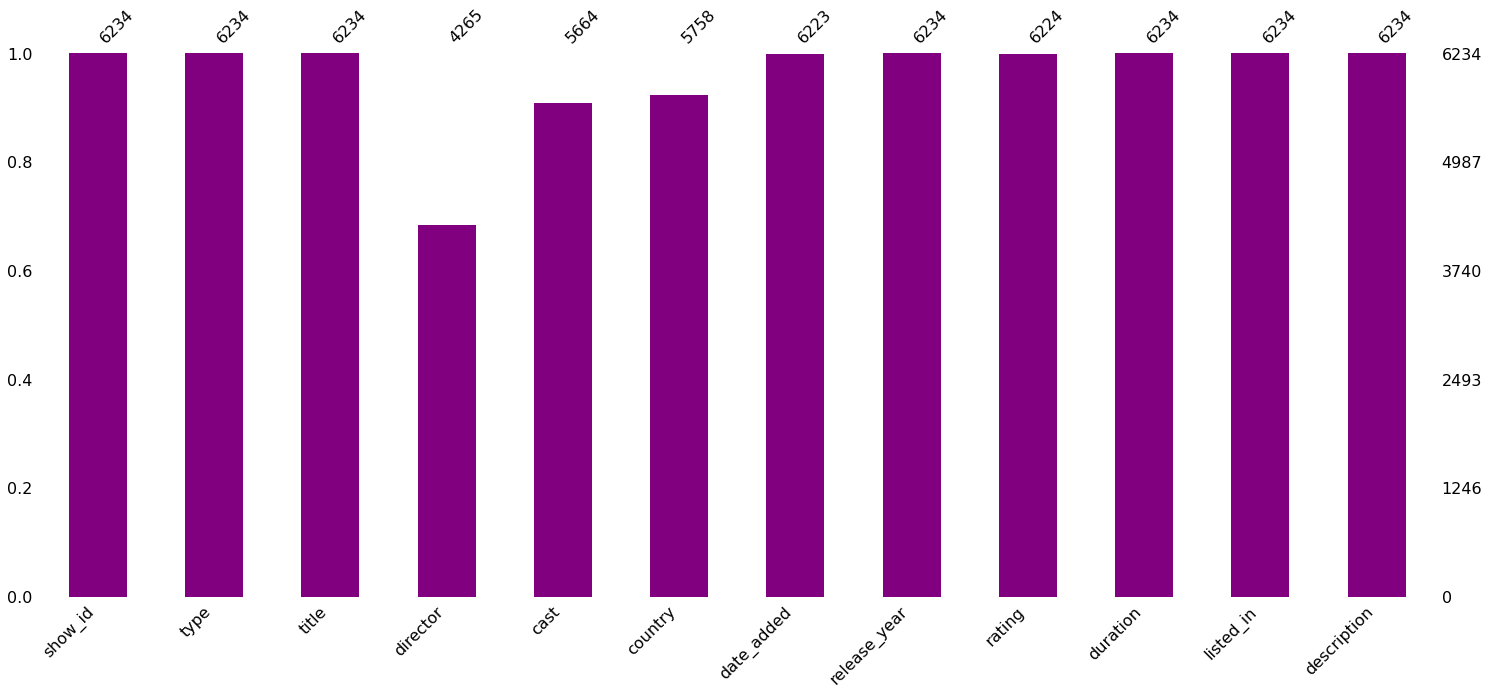

In [16]:
n = msno.bar(df,color='purple')


In [17]:
df.drop(["director","cast"],axis =1,inplace=True)
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [18]:
df['country'].value_counts()

United States                                          2032
India                                                   777
United Kingdom                                          348
Japan                                                   176
Canada                                                  141
                                                       ... 
China, South Korea, United States                         1
United States, Germany, Mexico                            1
Argentina, Brazil, France, Poland, Germany, Denmark       1
France, China, Canada                                     1
United States, Netherlands, Japan, France                 1
Name: country, Length: 554, dtype: int64

In [19]:
df['country'].replace(np.nan,"United States",inplace=True)
df['country'].value_counts()

United States                                          2508
India                                                   777
United Kingdom                                          348
Japan                                                   176
Canada                                                  141
                                                       ... 
China, South Korea, United States                         1
United States, Germany, Mexico                            1
Argentina, Brazil, France, Poland, Germany, Denmark       1
France, China, Canada                                     1
United States, Netherlands, Japan, France                 1
Name: country, Length: 554, dtype: int64

In [20]:
df['date_added'].value_counts()

January 1, 2020      122
November 1, 2019      94
March 1, 2018         78
December 31, 2019     74
October 1, 2018       72
                    ... 
February 5, 2016       1
October 21, 2017       1
October 21, 2018       1
February 27, 2017      1
December 5, 2016       1
Name: date_added, Length: 1524, dtype: int64

In [21]:
netflix_date = df[['date_added']].replace(np.nan,'Not Added')
netflix_date["release_month"] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix_date.head()

date_added release_month
0  September 9, 2019     September
1  September 9, 2016     September
2  September 8, 2018     September
3  September 8, 2018     September
4  September 8, 2017     September

In [22]:
netflix_date["release_month"].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
Not           11
Name: release_month, dtype: int64

In [23]:
netflix_date['release_month'].replace('Not', 0,inplace=True)

In [24]:
netflix_date["release_month"].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
0             11
Name: release_month, dtype: int64

In [25]:
netflix_date.drop("date_added",axis=1,inplace=True)
netflix_date.head()

release_month
0     September
1     September
2     September
3     September
4     September

In [26]:
netflix = pd.concat([df,netflix_date],axis=1)
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description release_month  
0  Before planning an awesome wedding for his gra...     September  
1  Jandino Asporaat riffs on the challenges of ra...     September  
2  With the help of three human allies, the Autob...     September  
3  When a prison ship crash unleashes hundreds of...     September  
4  When nerdy high schooler Dani finally attracts...     September

In [27]:
netflix.drop("date_added",axis=1,inplace=True)
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description release_month  
0  Before planning an awesome wedding for his gra...     September  
1  Jandino Asporaat riffs on the challenges of ra...     September  
2  With the help of three human allies, the Autob...     September  
3  When a prison ship crash unleashes hundreds of...     September  
4  When nerdy high schooler Dani finally attracts...     September

In [28]:
netflix["rating"].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [29]:
netflix["rating"].isnull().sum()

10

In [30]:
netflix["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

In [31]:
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description release_month  
0  Before planning an awesome wedding for his gra...     September  
1  Jandino Asporaat riffs on the challenges of ra...     September  
2  With the help of three human allies, the Autob...     September  
3  When a prison ship crash unleashes hundreds of...     September  
4  When nerdy high schooler Dani finally attracts...     September

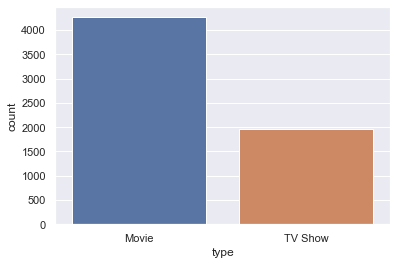

In [32]:
sns.set()
sns.countplot(x="type",data=netflix)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

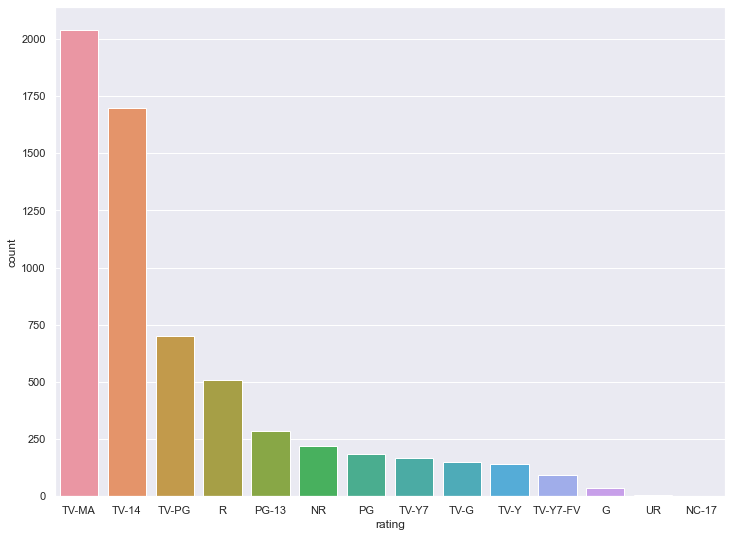

In [41]:
# plt.figure(figsize=(12,9))
sns.countplot(x="rating",data=netflix,order= netflix['rating'].value_counts().index[0:14])

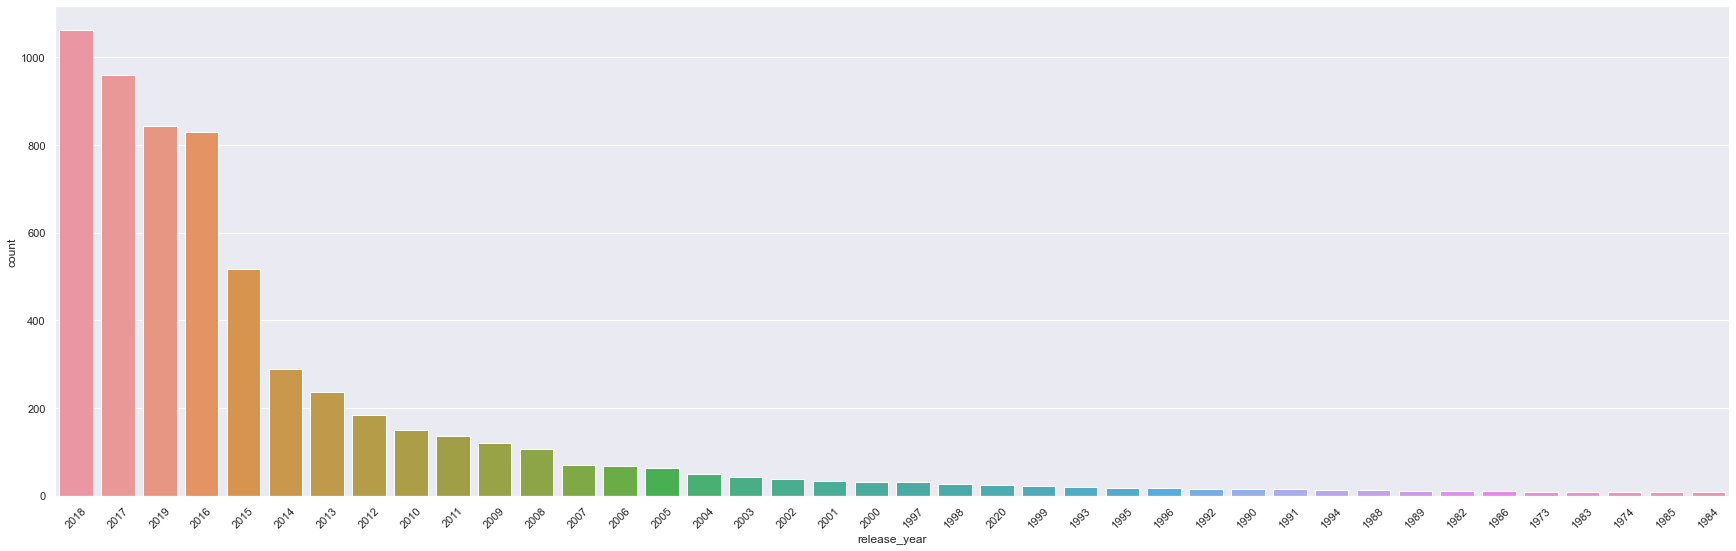

In [40]:
sns.set()
# plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= netflix,order = netflix['release_year'].value_counts().index[0:40])
plt.xticks(rotation=45)
plt.show()

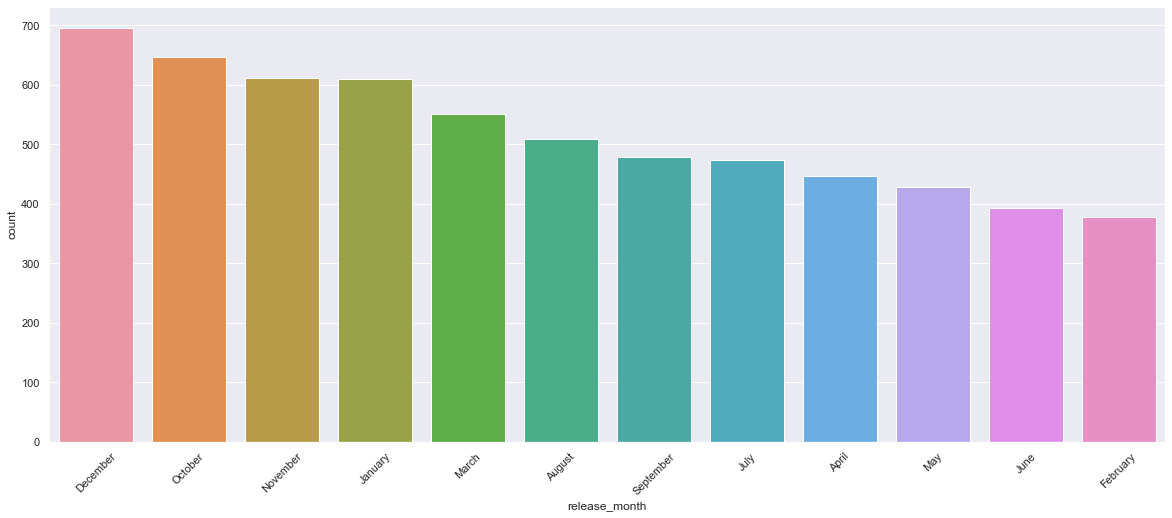

In [42]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="release_month",data= netflix,order = netflix['release_month'].value_counts().index[0:12])
plt.xticks(rotation=45)
plt.show()

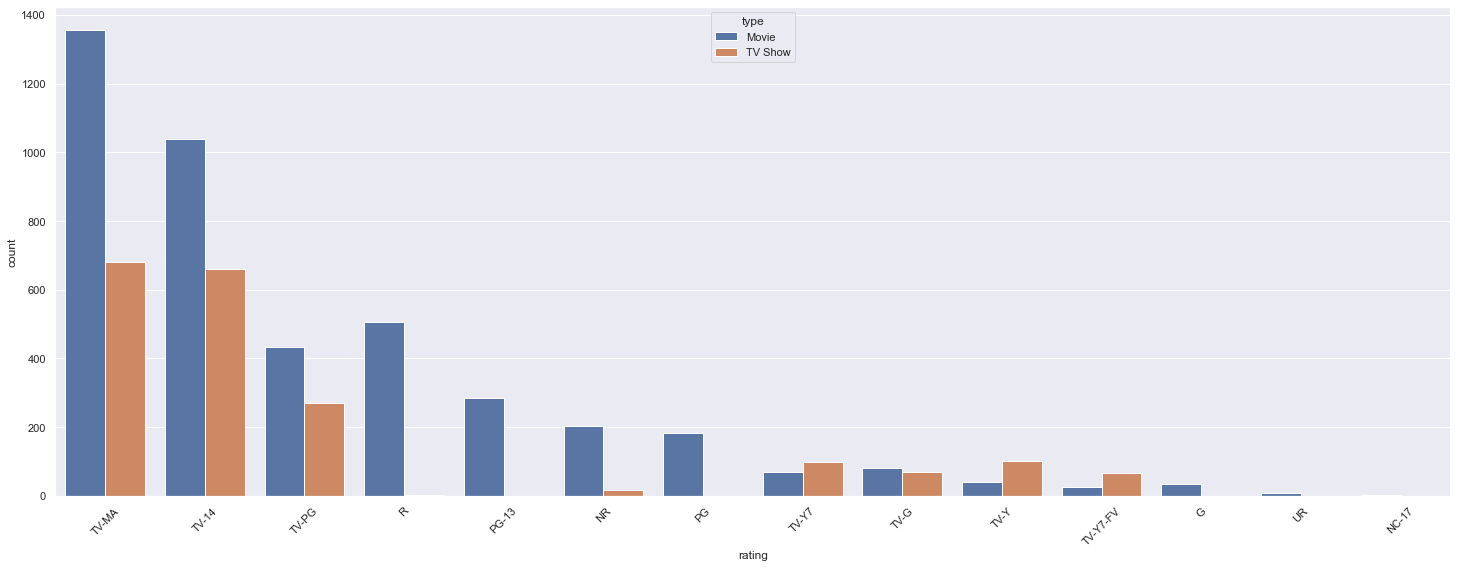

In [43]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= netflix,hue= "type",order = netflix['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

In [44]:
netflix["country"].value_counts().head()

United States     2508
India              777
United Kingdom     348
Japan              176
Canada             141
Name: country, dtype: int64

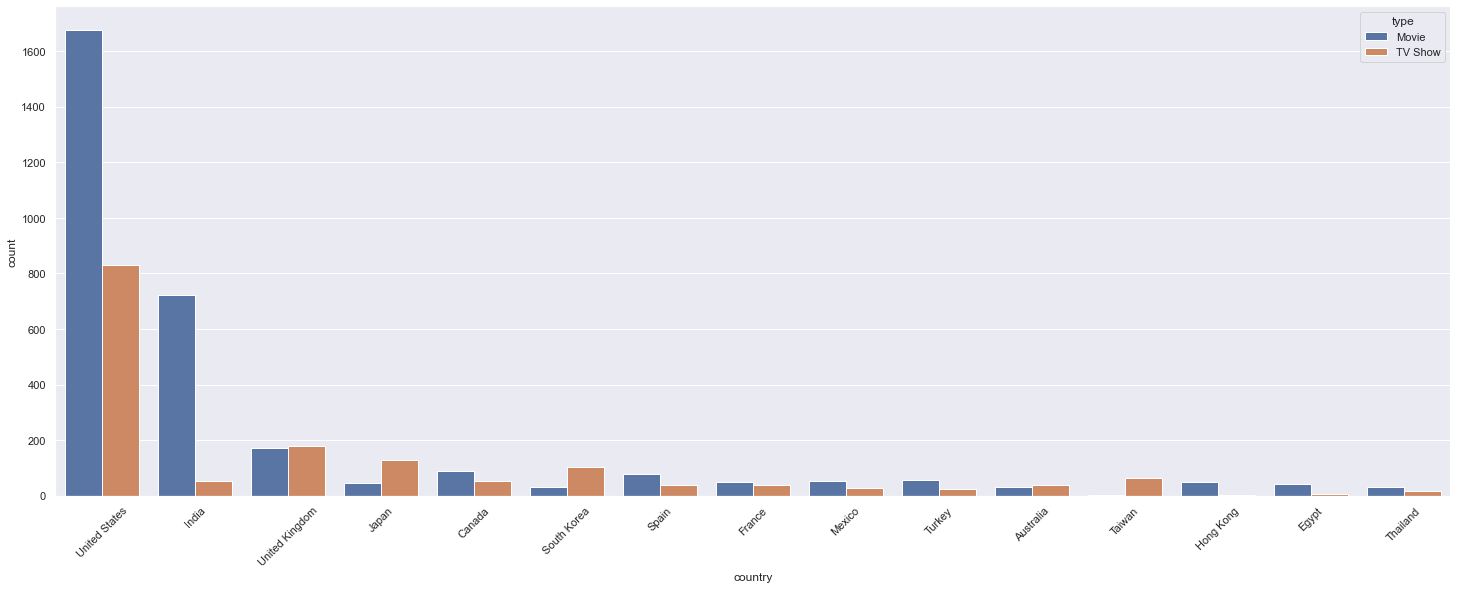

In [31]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= netflix,hue= "type",order = netflix['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

In [46]:
top = netflix['country'].value_counts()[0:8]
top.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'Canada',
       'South Korea', 'Spain', 'France'],
      dtype='object')

In [47]:
fig = px.pie(netflix,values = top,names = top.index,labels= top.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

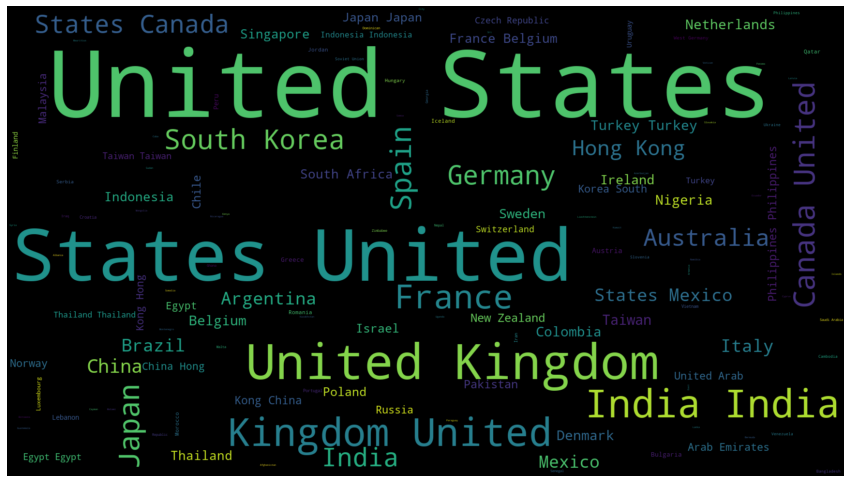

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(netflix.country))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

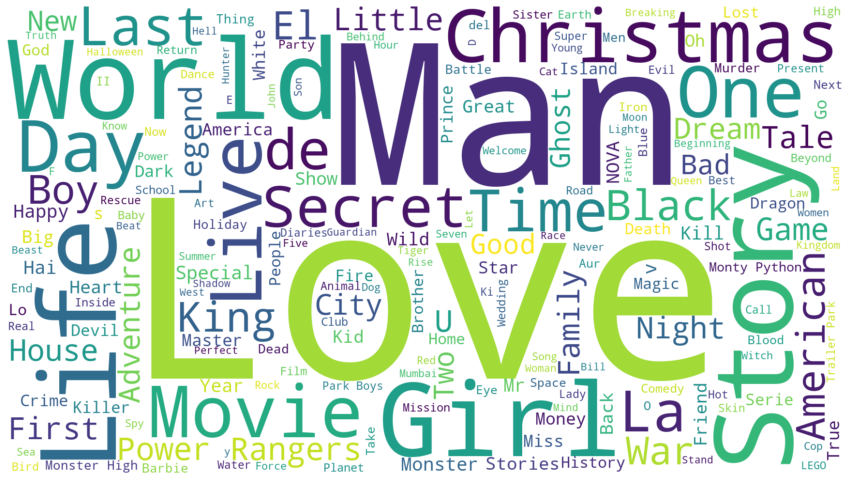

In [36]:
wordcloud = WordCloud(background_color = "white",width=1730,height=970).generate(" ".join(netflix.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

In [37]:
top_listed_in=netflix["listed_in"].value_counts()[0:25]
top_listed_in.head()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

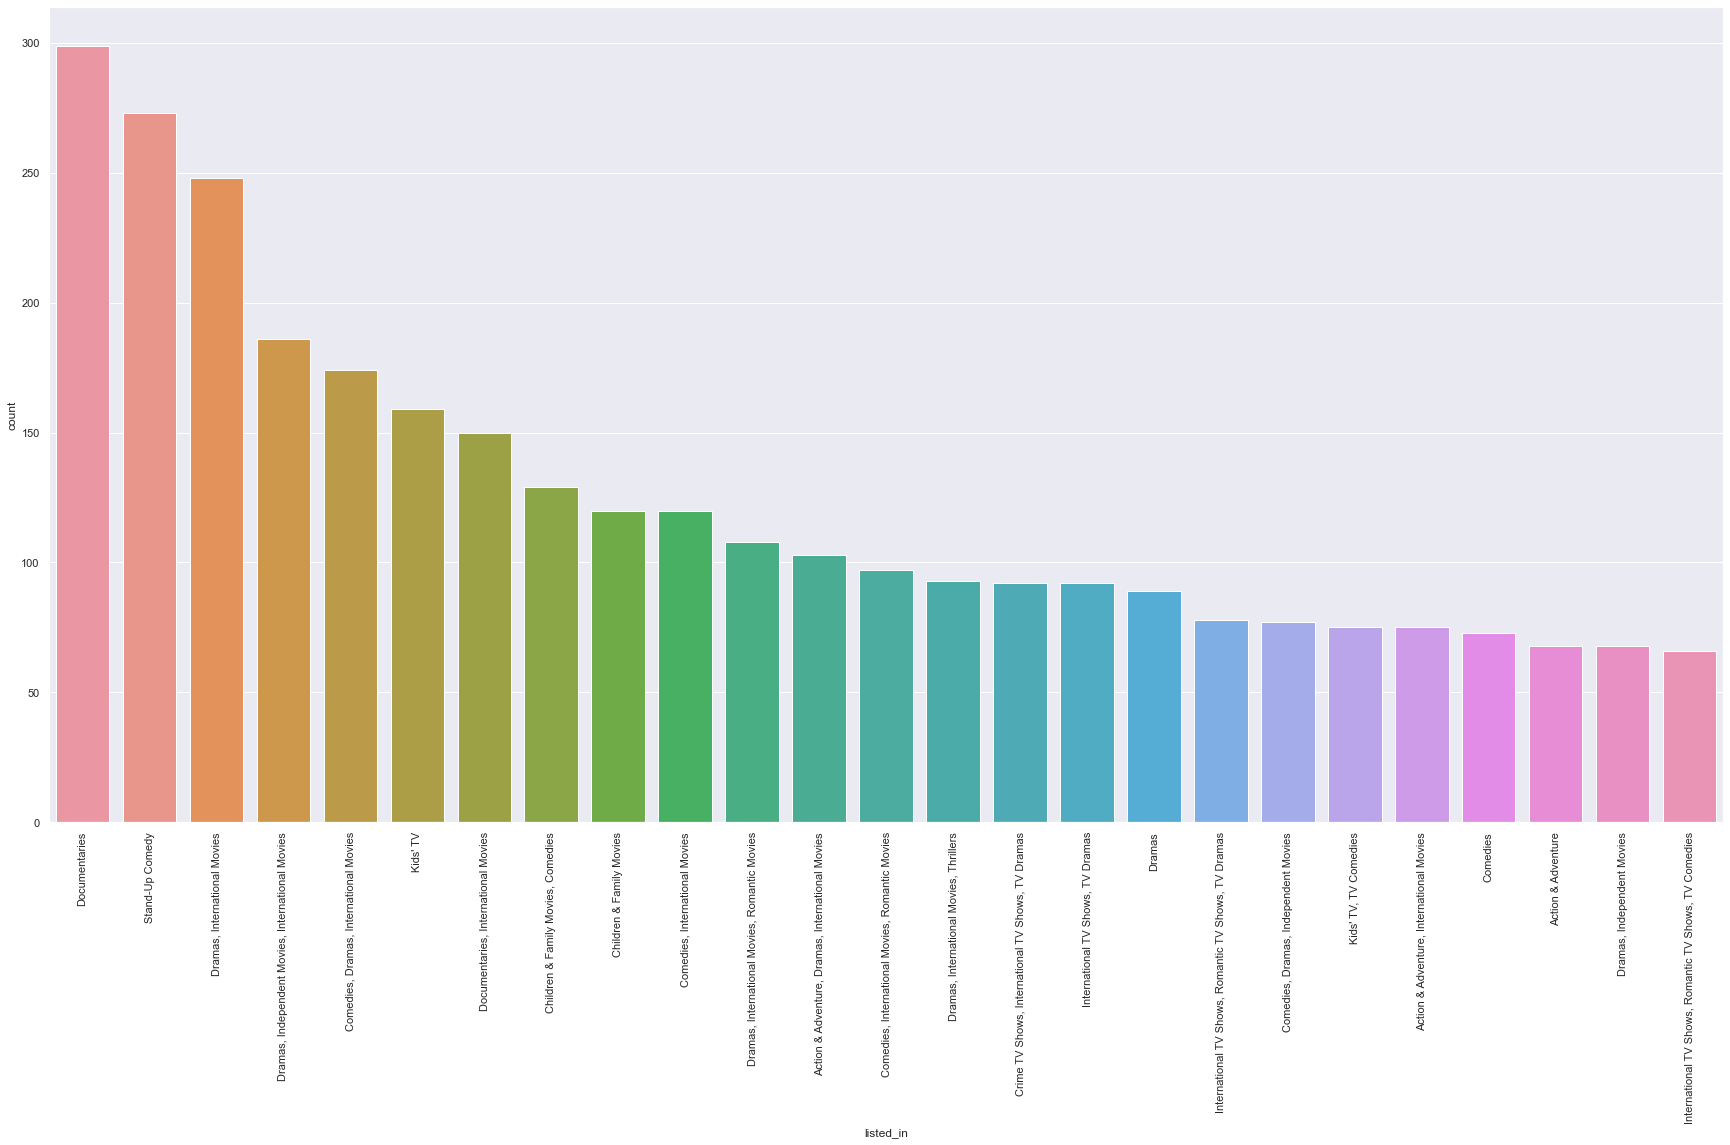

In [38]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',data = netflix,order =netflix["listed_in"].value_counts().index[0:25])
plt.xticks(rotation = 90)
plt.show()

In [39]:
fig = px.pie(netflix,values = top_listed_in,names = top_listed_in.index,labels= top_listed_in.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

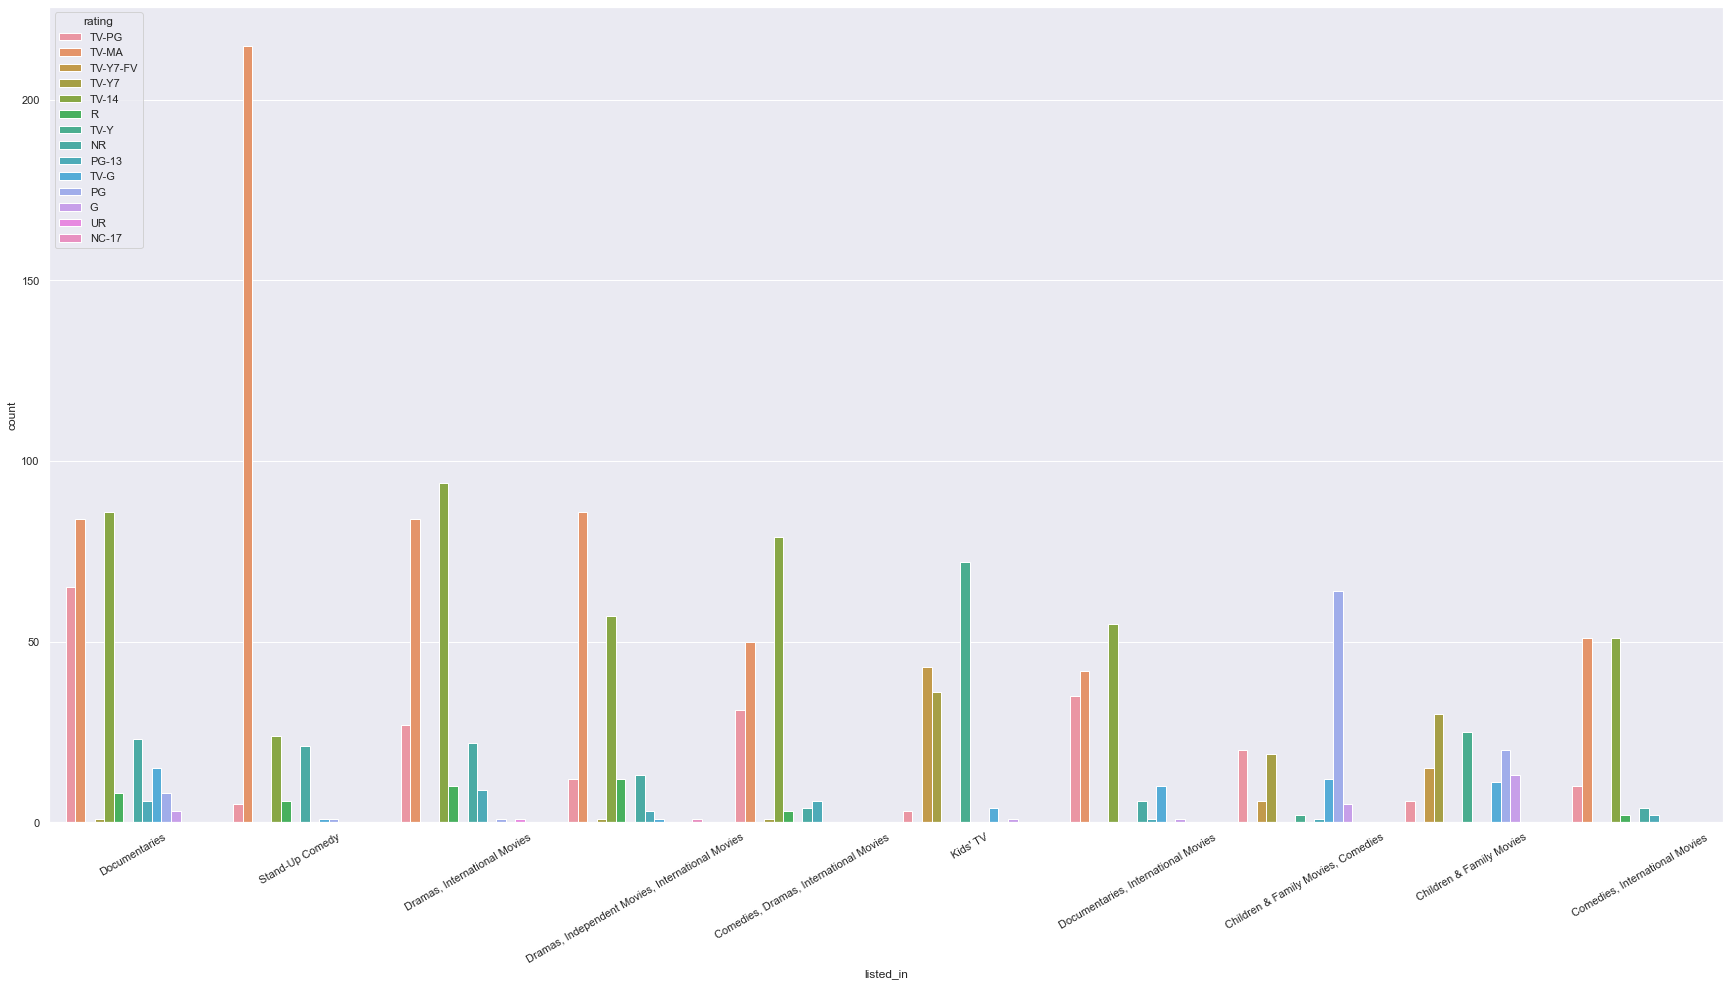

In [40]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',hue='rating',data = netflix,order =netflix["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 30)
plt.show()

In [41]:
old = netflix.sort_values("release_year",ascending=True)
old[["title","type","country","release_year"]].head(20)

title     type  \
4292                 Pioneers: First Women Filmmakers*  TV Show   
2011                                    Prelude to War    Movie   
2013                              The Battle of Midway    Movie   
2022     Undercover: How to Operate Behind Enemy Lines    Movie   
2023                Why We Fight: The Battle of Russia    Movie   
2026                   WWII: Report from the Aleutians    Movie   
2017  The Memphis Belle: A Story of a\nFlying Fortress    Movie   
2019                                 The Negro Soldier    Movie   
2021                                  Tunisian Victory    Movie   
2012                                        San Pietro    Movie   
2009                          Nazi Concentration Camps    Movie   
2005                           Know Your Enemy - Japan    Movie   
2930                                      The Stranger    Movie   
4079               Pioneers of African-American Cinema  TV Show   
2006                                Let There Be Light    Movie   
2020                                       Thunderbolt    Movie   
2981                                   White Christmas    Movie   
1401                             Rebel Without a Cause    Movie   
1369                                  Forbidden Planet    Movie   
1371                                              Gigi    Movie   

                            country  release_year  
4292                  United States          1925  
2011                  United States          1942  
2013                  United States          1942  
2022                  United States          1943  
2023                  United States          1943  
2026                  United States          1943  
2017                  United States          1944  
2019                  United States          1944  
2021  United States, United Kingdom          1944  
2012                  United States          1945  
2009                  United States          1945  
2005                  United States          1945  
2930                  United States          1946  
4079                  United States          1946  
2006                  United States          1946  
2020                  United States          1947  
2981                  United States          1954  
1401                  United States          1955  
1369                  United States          1956  
1371                  United States          1958

In [42]:
kids_show=netflix[netflix["listed_in"] == "Kids' TV"].reset_index()
kids_show[["title","country","release_year"]].head(10)

title  \
0                                Transformers Prime   
1                  Transformers: Robots in Disguise   
2                                            Ben 10   
3                                             Hilda   
4                        Kulipari: An Army of Frogs   
5                         Transformers: Rescue Bots   
6                      Super Monsters Monster Party   
7  Loo Loo Kids: Johny & Friends Musical Adventures   
8                  Transformers Rescue Bots Academy   
9                          Transformers: Cyberverse   

                                 country  release_year  
0                          United States          2013  
1                          United States          2016  
2                          United States          2016  
3  United Kingdom, Canada, United States          2018  
4                          United States          2016  
5                  Canada, United States          2016  
6                          United States          2018  
7                          United States          2016  
8                          United States          2019  
9                          United States          2018

In [43]:
netflix[netflix["country"] == "India"]

show_id     type                                              title  \
35    81154455    Movie                                         Article 15   
37    81052275    Movie                              Ee Nagaraniki Emaindi   
41    70303496    Movie                                                 PK   
58    81155784    Movie                                           Watchman   
99    80225885  TV Show                                      Bard of Blood   
...        ...      ...                                                ...   
5573  80171439    Movie  The Human Factor: The Untold Story of the Bomb...   
5708  81011159  TV Show                                      Little Things   
5839  80178836  TV Show                             The House That Made Me   
5867  80207879  TV Show                                   Sab Jholmaal Hai   
5923  80122239  TV Show                                Pyaar Tune Kya Kiya   

     country  release_year rating   duration  \
35     India          2019  TV-MA    125 min   
37     India          2018  TV-14    133 min   
41     India          2014  TV-14    146 min   
58     India          2019  TV-14     93 min   
99     India          2019  TV-MA   1 Season   
...      ...           ...    ...        ...   
5573   India          2013  TV-PG     53 min   
5708   India          2019  TV-MA  3 Seasons   
5839   India          2015  TV-PG  3 Seasons   
5867   India          2017   TV-G  4 Seasons   
5923   India          2014  TV-14  3 Seasons   

                                              listed_in  \
35              Dramas, International Movies, Thrillers   
37                       Comedies, International Movies   
41               Comedies, Dramas, International Movies   
58               Comedies, Dramas, International Movies   
99    International TV Shows, TV Action & Adventure,...   
...                                                 ...   
5573  Documentaries, International Movies, Music & M...   
5708  International TV Shows, Romantic TV Shows, TV ...   
5839                 International TV Shows, Reality TV   
5867                              Kids' TV, TV Comedies   
5923  International TV Shows, Romantic TV Shows, TV ...   

                                            description release_month  
35    The grim realities of caste discrimination com...     September  
37    In Goa and in desperate need of cash, four chi...     September  
41    Aamir Khan teams with director Rajkumar Hirani...     September  
58    Rushing to pay off a loan shark, a young man b...     September  
99    Years after a disastrous job in Balochistan, a...     September  
...                                                 ...           ...  
5573  A family of Parsi musicians collectively works...         April  
5708  A cohabiting couple in their 20s navigate the ...      November  
5839  With host Vinay Pathak, Indian celebrities ret...         March  
5867  In this madcap comedy, two mischievous cats, a...         March  
5923  From teen lovers defying social and religious ...          June  

[777 rows x 10 columns]

In [44]:
Country = pd.DataFrame(netflix["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

country TotalShows
0   United States       2508
1           India        777
2  United Kingdom        348
3           Japan        176
4          Canada        141

In [45]:
fig = px.choropleth(   
    locationmode='country names',
    locations=Country.country,
    featureidkey="Country.country",
    labels=Country["TotalShows"]
)
fig.show()